# パラメータ推定

データを最もよく再現するパラメータを推定する。確率モデルのパラメータを最尤推定する方法の1つ。

## 最尤推定

後で紹介するEMアルゴリズムは最尤推定が基本にあるため、紹介。
尤度(もっともらしさ)を最大にする。最ももっともらしい値を推定。

表が 0.3 の確率で出るコイン A と表が 0.8 の確率で出るコイン B があるとする。
A か B か分からないがどちらかのコインを 3 回続けて投げたら、表、裏、表という順番で出た。

- コイン A を使ったときの確率（尤度）は、 `0.3　×　（1－0.3）　×　0.3　＝　0.063`
- コイン B を使ったときの確率（尤度）は、 `0.8　×　（1－0.8）　×　0.8　＝　0.128`

コインBを使った時のほうが確率(尤度)が高い

## EMアルゴリズム

毎回コインA、コインBのどちらも使う可能性も考慮。

**アルゴリズム**

http://www.slideshare.net/yag_ays/em-algorithm-animation

1. パラメータの初期値を決める
2. Expectation ステップ: 未観測データの期待値を求める
3. Maximizationステップ: 未観測データを動かして、目的関数を最大にするパラメータを求める
4. 収束するまで 2 と 3 のステップを繰り返す

デメリット

- 局所最適解に陥る可能性がある
- パラメータが発散して収束できないことがある

## 実践

混合ガウスモデル（GMM）のパラメータ推定は、解析的に解けないのでEMアルゴリズムを使用する。
GMMでは、混合係数と平均ベクトルと共分散行列がパラメータに当たる。つまりGMMの学習は、尤度がもっとも高くなる混合係数と平均ベクトルと共分散行列を推定することを指す。

※ ガウス分布の個数Kは自分で決め打ちする必要がある

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture

In [22]:
# 間欠泉データ
df = pd.read_csv('https://raw.githubusercontent.com/aidiary/PRML/master/ch9/faithful.txt', sep=' ', header=None)
df.columns = ['直近の噴出継続時間', '次回の噴出までの待ち時間']

In [23]:
df[:5]

,直近の噴出継続時間,次回の噴出までの待ち時間
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


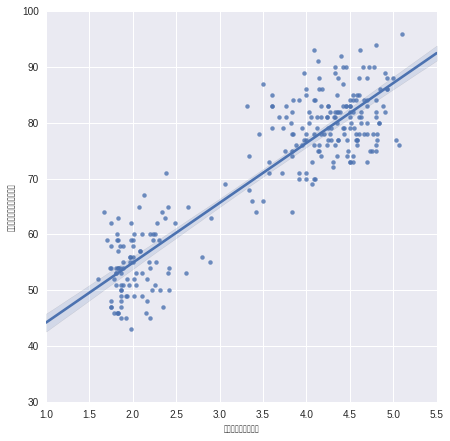

In [25]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot('直近の噴出継続時間', '次回の噴出までの待ち時間', data=df, ax=ax)
plt.show()

散布図より、データは2つの山に分かれている事がわかる。
ガウス分布2つでうまくモデル化出来そう。

In [28]:
df = (df - df.mean()) / df.std()  # 正規化

In [26]:
g = mixture.GMM(n_components=2)

In [29]:
g.fit(df)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

`fit` に学習データを与えるだけでパラメータ推定できる。
混合係数はweights_、平均ベクトルはmeans_、共分散行列はcovars_に格納される。

In [32]:
print(g.weights_)

[ 0.64346832  0.35653168]


In [33]:
print(g.means_)

[[ 0.70381824  0.66854874]
 [-1.27025105 -1.20659667]]


In [34]:
print(g.covars_)

[[ 0.13004823  0.19453084]
 [ 0.05501827  0.18365945]]


## 参考資料

- http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html
- http://aidiary.hatenablog.com/entry/20150322/1427026731
- https://ja.wikipedia.org/wiki/EM%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0